In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [3]:
# Using NAO to plot differences in precipitation anomalies in positive and negative NAO
path_nao='/home/pdirmeye/classes/clim680_2022/CLIM_INDICES/'
file_nao='nao.data'
index_name='nao'

df=pd.read_table(path_nao+file_nao,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)


In [4]:
# Defining the start and end dates for the NAO dataset
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [5]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [6]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [7]:
# Setting the NAO as the choice climate index
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) float32 nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

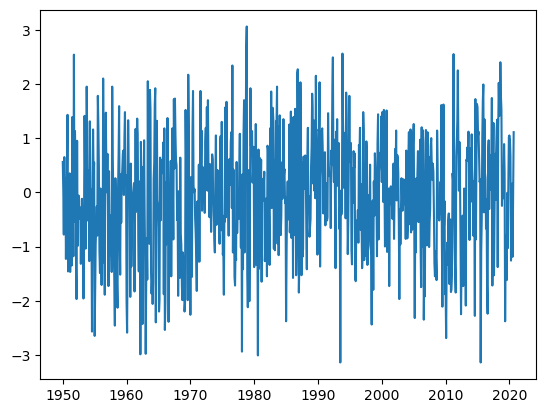

In [8]:
# Timeseries of NAO throughout time
plt.plot(ds_index['time'],ds_index['nao'])

In [9]:
# Defining conditions for positive NAO and negative NAO
positive_nao = ds_index['nao'].where(ds_index['nao']>0)
negative_nao = ds_index['nao'].where(ds_index['nao']<0)


positive_nao

<xarray.DataArray 'nao' (time: 876)>
array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan, 0.56, 0.01,  nan, 0.65,  nan, 0.25,  nan,  nan, 0.39,
       1.43,  nan,  nan,  nan, 0.35,  nan,  nan,  nan,  nan, 1.39,  nan,
        nan, 2.54,  nan, 1.13, 0.57,  nan,  nan, 0.95,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 1.41,
       0.43,  nan,  nan, 1.95, 0.96,  nan,  nan, 0.4 ,  nan, 1.31,  nan,
       0.06,  nan,  nan,  nan, 1.16, 0.29, 0.55,  nan,  nan,  nan,  nan,
        nan,  nan, 1.78, 1.25, 0.46,  nan,  nan, 0.07,  nan,  nan,  nan,
        nan, 2.1 , 0.41,  nan,  nan, 0.38, 1.47, 0.4 ,  nan, 0.71,  nan,
        nan, 0.39,  nan,  nan,  nan,  nan,  nan, 1.95, 0.63, 0.02,  nan,
        nan,  nan, 0.26,  nan,  nan,  nan,  nan, 0.08, 0.68, 1.59,  nan,
        nan, 0.33,  nan, 0.25, 0.41, 0.71, 0.77,  nan, 1.  , 1.48, 0.3 ,
       0.32,  nan,  nan,  nan, 1.33, 0.47, 0.1 , 0.38,  nan, 0.53,  nan,
        nan,  nan,  nan, 0.07, 0.17,  nan,  nan, 1.17,  nan, 1.03, 1.36,
       1.07,  nan,  nan, 0.2 , 0.18,  nan, 0.93,  nan, 0.47,  nan, 0.05,
        nan, 0.96,  nan,  nan,  nan,  nan,  nan,  nan, 2.05,  nan,  nan,
        nan, 1.89, 1.53,  nan,  nan,  nan,  nan,  nan, 0.25, 0.53, 1.61,
       1.92,  nan, 0.34, 1.32,  nan,  nan,  nan,  nan,  nan, 0.64,  nan,
       0.6 , 0.35, 0.45, 0.51, 0.92,  nan, 1.18,  nan,  nan, 0.18,  nan,
...
        nan, 0.26,  nan,  nan, 0.06, 0.24, 0.16,  nan, 0.16,  nan, 0.77,
       0.5 ,  nan,  nan, 0.67, 1.11, 0.23,  nan, 1.16,  nan, 0.52,  nan,
       0.63, 1.03, 1.26,  nan,  nan,  nan,  nan, 0.26,  nan, 0.35, 0.76,
        nan,  nan,  nan, 0.97,  nan,  nan, 1.2 ,  nan, 1.15, 0.93,  nan,
        nan,  nan, 0.33, 1.15,  nan,  nan, 1.11, 0.04, 0.66,  nan,  nan,
        nan, 0.85, 1.  , 0.48, 0.23, 0.53, 0.38,  nan,  nan,  nan,  nan,
        nan,  nan, 1.14, 0.47,  nan,  nan,  nan,  nan, 0.19,  nan, 1.61,
        nan,  nan,  nan, 1.62,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.35, 0.24,
       2.55,  nan,  nan,  nan,  nan, 0.67, 0.94, 1.3 , 2.25, 0.86, 0.03,
       0.93, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.07,  nan,
        nan,  nan, 0.6 , 0.58, 0.83, 0.7 , 1.12, 0.38,  nan, 0.81, 0.79,
        nan, 1.07, 0.44, 0.19,  nan,  nan, 0.21,  nan, 1.72,  nan, 0.58,
       1.63, 1.57, 1.05, 1.12, 0.64, 0.19, 0.24,  nan,  nan,  nan, 0.99,
       1.7 , 1.99,  nan, 1.35, 0.37, 0.26,  nan,  nan,  nan,  nan, 0.74,
       0.96,  nan, 0.35, 0.05, 0.69, 0.37, 1.74,  nan, 0.35, 1.28,  nan,
        nan, 0.71,  nan, 0.73, 1.17, 1.34,  nan, 1.2 , 2.02, 1.41, 1.42,
       2.4 , 1.78, 1.53,  nan, 0.48, 0.18,  nan, 0.89, 0.36,  nan,  nan,
        nan,  nan,  nan,  nan, 0.16, 1.02, 1.05, 0.98, 0.66,  nan,  nan,
       0.16,  nan, 0.03, 1.11,  nan,  nan,  nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01

## First Submission

In [10]:
file = '/home/nblancoa/GPCP_precip.mon.mean.nc'
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 496, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

In [12]:
da_precip = ds.precip.sel(time=slice(ds_index['time'][0],ds_index['time'][-1]))

In [13]:
# Calculating precipitation climatology and anomalies
ds_climo = da_precip.groupby('time.month').mean()
ds_anoms = da_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.DataArray 'precip' (time: 496, lat: 72, lon: 144)>
array([[[-0.02143169, -0.03080357, -0.03371227, ..., -0.02775554,
         -0.02410768, -0.0188971 ],
        [-0.01639973, -0.01635575, -0.01888895, ..., -0.02553909,
         -0.02369578, -0.02063697],
        [-0.02134272, -0.02133826, -0.02502474, ..., -0.03211967,
         -0.02818718, -0.02400281],
        ...,
        [ 0.3934903 ,  0.35848325,  0.25259674, ...,  0.34514904,
          0.26922697,  0.33154368],
        [ 0.27203378,  0.27761796,  0.19796616, ...,  0.24332133,
          0.2657102 ,  0.2805632 ],
        [ 0.19065529,  0.13826922,  0.16775972, ...,  0.12149724,
          0.16342193,  0.2365261 ]],

       [[ 0.2679568 ,  0.2558763 ,  0.24914628, ...,  0.24407433,
          0.23742586,  0.24340731],
        [ 0.2072508 ,  0.22784309,  0.23124146, ...,  0.21411692,
          0.21389198,  0.22316092],
        [ 0.01854359,  0.02927981,  0.02064953, ...,  0.09981102,
          0.11961818,  0.04901559],
...
        [-0.14300439, -0.12934972, -0.13660927, ..., -0.13720864,
         -0.14732446, -0.13172872],
        [-0.00961605, -0.02407897, -0.02431229, ...,  0.00800879,
         -0.01549846, -0.01695517],
        [ 0.11778808,  0.10717149,  0.09070709, ...,  0.125629  ,
          0.10866599,  0.10407291]],

       [[-0.0533372 , -0.05527425, -0.08414231, ..., -0.02771099,
         -0.103349  , -0.08312945],
        [ 0.137938  ,  0.10231255,  0.08444564, ...,  0.19981427,
          0.16193716,  0.15530525],
        [ 0.2567353 ,  0.233551  ,  0.23209795, ...,  0.28905034,
          0.28299373,  0.2732247 ],
        ...,
        [ 0.34044567,  0.35423356,  0.38082448, ...,  0.24132502,
          0.29762268,  0.32461876],
        [ 0.13494235,  0.13286343,  0.15934375, ...,  0.15030572,
          0.13724568,  0.154986  ],
        [ 0.02710366,  0.02756219,  0.01394811, ...,  0.052077  ,
          0.04141691,  0.01890981]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 6 7 8 9 10 11 12 1 2 3 4

In [15]:
# Setting time period of the precipitation dataset to match the time period of the NAO dataset
positive_nao_precip = ds_anoms.sel(time=positive_nao.dropna(dim='time')['time'],method="nearest").mean(dim='time')
negative_nao_precip = ds_anoms.sel(time=negative_nao.dropna(dim='time')['time'],method="nearest").mean(dim='time')


comp_precip = [positive_nao_precip,negative_nao_precip]
comp_precip

[<xarray.DataArray 'precip' (lat: 72, lon: 144)>
 array([[-1.01837479e-02, -1.22619756e-02, -1.27506554e-02, ...,
         -8.46596435e-03, -1.19012296e-02, -4.35266504e-03],
        [ 7.21402001e-04,  3.12748511e-04, -2.24800943e-03, ...,
         -2.00297846e-03, -2.79709231e-04, -1.04176672e-03],
        [ 3.02829593e-03,  2.45056814e-03, -9.85040795e-04, ...,
         -1.91925094e-03,  6.97008509e-05,  2.58576684e-03],
        ...,
        [ 1.57472804e-01,  1.43845096e-01,  1.07132033e-01, ...,
          1.38909832e-01,  1.14530854e-01,  1.33980870e-01],
        [ 1.09095693e-01,  1.10948898e-01,  8.30178410e-02, ...,
          9.64527875e-02,  1.09741889e-01,  1.14630133e-01],
        [ 8.08408484e-02,  6.12657331e-02,  7.42963701e-02, ...,
          5.55634685e-02,  7.07527697e-02,  9.80776995e-02]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
   * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.

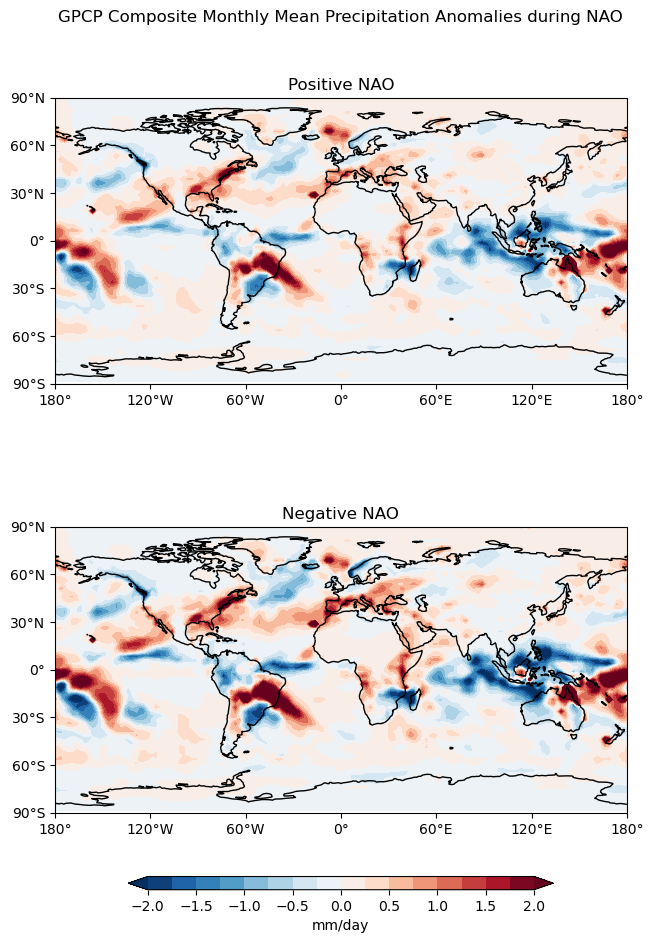

In [16]:
# Plotting subplots of the composite monthly mean precipitation anomalies in positive and negative phases of NAO

labels=['Positive NAO','Negative NAO']
clevs = np.arange(-2.0,2.1,0.25)

fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

axs = axs.flatten()

for i,nao in enumerate(comp_precip):
       
        data = comp_precip[i]

        data,lons = add_cyclic_point(data,coord=comp_precip[i]['lon'])

        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='RdBu_r',extend='both')

        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        axs[i].set_title(labels[i])
        axs[i].coastlines()
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

plt.suptitle("GPCP Composite Monthly Mean Precipitation Anomalies during NAO") ;